In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from regprepare import get_auto_mpg, train_val_test

# Regression Model Evaluation

> ### $RMSE$ & $R^2$

## Wrangle Data

In [6]:
df = get_auto_mpg()

In [7]:
df.head()

,mpg,cylinders,displ,horsepower,weight,acc,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


## Split Data

In [9]:
train, val, test = train_val_test(df,stratify='mpg')

In [10]:
train.shape

(235, 9)

In [16]:
round(train['mpg'].mean(),2)

23.5

In [13]:
predictions = train[['horsepower','mpg']]

In [ ]:
# Baseline_Predictions

In [17]:
predictions['baseline_predictions']=round(train['mpg'].mean(),2)

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_45058/401726541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['baseline_predictions']=round(train['mpg'].mean(),2)


In [18]:
predictions.head()

,horsepower,mpg,baseline_predictions
212,180.0,16.5,23.5
346,67.0,32.3,23.5
325,48.0,44.3,23.5
90,198.0,12.0,23.5
246,52.0,32.8,23.5


## Model

### $Ordinary Least Squares$

In [19]:
ols_model = LinearRegression()
ols_model.fit(train[['horsepower']],train[['mpg']])

LinearRegression()

In [21]:
predictions['yhat'] = ols_model.predict(train[['horsepower']])

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_45058/3519817954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['yhat'] = ols_model.predict(train[['horsepower']])


In [23]:
predictions.head()

,horsepower,mpg,baseline_predictions,yhat
212,180.0,16.5,23.5,11.058302
346,67.0,32.3,23.5,30.114463
325,48.0,44.3,23.5,33.318596
90,198.0,12.0,23.5,8.022807
246,52.0,32.8,23.5,32.644042


### Compute Residuals

In [24]:
predictions['baseline_res']=predictions['baseline_predictions']-predictions['mpg']
predictions.head()

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_45058/383058161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['baseline_res']=predictions['baseline_predictions']-predictions['mpg']


,horsepower,mpg,baseline_predictions,yhat,baseline_res
212,180.0,16.5,23.5,11.058302,7.0
346,67.0,32.3,23.5,30.114463,-8.8
325,48.0,44.3,23.5,33.318596,-20.8
90,198.0,12.0,23.5,8.022807,11.5
246,52.0,32.8,23.5,32.644042,-9.3


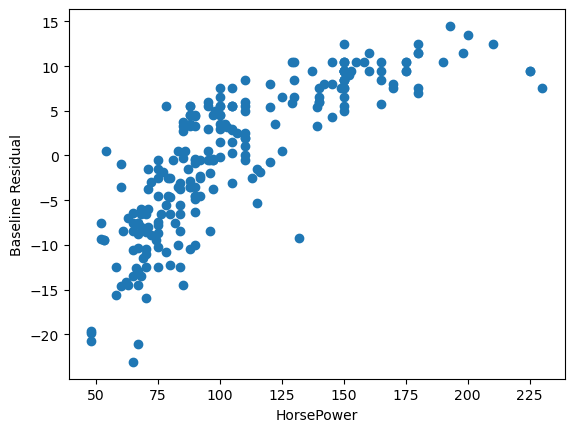

In [26]:
plt.scatter(predictions['horsepower'],predictions['baseline_res'])
plt.xlabel('HorsePower')
plt.ylabel('Baseline Residual')
plt.show()

In [28]:
predictions['yhat_res']=predictions['yhat']-predictions['mpg']ba

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_45058/2300957382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['yhat_res']=predictions['yhat']-predictions['mpg']


In [29]:
predictions

,horsepower,mpg,baseline_predictions,yhat,baseline_res,yhat_res
212,180.0,16.5,23.5,11.058302,7.0,-5.441698
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404
90,198.0,12.0,23.5,8.022807,11.5,-3.977193
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958
...,...,...,...,...,...,...
72,150.0,15.0,23.5,16.117459,8.5,1.117459
107,100.0,18.0,23.5,24.549389,5.5,6.549389
272,85.0,23.8,23.5,27.078968,-0.3,3.278968
352,65.0,29.9,23.5,30.451740,-6.4,0.551740


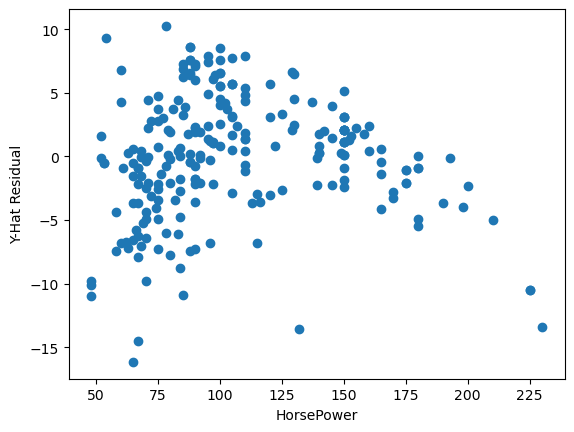

In [30]:
plt.scatter(predictions['horsepower'],predictions['yhat_res'])
plt.xlabel('HorsePower')
plt.ylabel('Y-Hat Residual')
plt.show()

## Evaluate / Metrics

### $SSE$
Sum of Squared Errors

In [32]:
predictions.columns

Index(['horsepower', 'mpg', 'baseline_predictions', 'yhat', 'baseline_res',
       'yhat_res'],
      dtype='object')

In [33]:
predictions['baseline_res_squared'] = predictions['baseline_res']**2
predictions['yhat_res_squared']= predictions['yhat_res']**2

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_45058/605339726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['baseline_res_squared'] = predictions['baseline_res']**2
/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_45058/605339726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['yhat_res_squared']= predictions['yhat_res']**2


In [ ]:
# squaring to ignore negatives and only observe magnitude

In [34]:
predictions.head()

,horsepower,mpg,baseline_predictions,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323


In [37]:
sse_baseline = predictions['baseline_res_squared'].sum()
sse_yhat = predictions['yhat_res_squared'].sum()
sse_baseline,sse_yhat

(15330.830000000002, 5355.469277811718)

### $MSE$
Mean Squared Errors

In [47]:
predictions.drop(columns=['mse_baseline','mse_yhat'],inplace=True)

In [44]:
mse_baseline = sse_baseline/len(predictions)
mse_yhat = sse_yhat/len(predictions)
mse_baseline,mse_yhat

(65.23757446808511, 22.789230969411566)

### $RMSE$
Root Mean Squared Errors

In [50]:
rmse_baseline = sqrt(mse_baseline)
rmse_yhat = sqrt(mse_yhat)
rmse_baseline,rmse_yhat

(8.076978052965423, 4.773806758700185)

### Function

In [51]:
sqrt(mean_squared_error(predictions['mpg'],predictions['baseline_predictions']))

8.076978052965423

In [52]:
sqrt(mean_squared_error(predictions['mpg'],predictions['yhat']))

4.773806758700185

### $ESS$

$ESS = \sum_{i=1}^{n}(\hat{y}_{i}-\bar{y})^2$

### Manual

In [56]:
predictions.head(2)

,horsepower,mpg,baseline_predictions,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574


In [57]:
predictions['yhat_mean_res']=predictions['yhat']-predictions['baseline_predictions']
predictions.head()

,horsepower,mpg,baseline_predictions,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081,-12.441698
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574,6.614463
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236,9.818596
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065,-15.477193
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323,9.144042


In [58]:
predictions['yhat_mean_res_squared']=predictions['yhat_mean_res']**2

In [59]:
predictions.head()

,horsepower,mpg,baseline_predictions,yhat,baseline_res,yhat_res,baseline_res_squared,yhat_res_squared,yhat_mean_res,yhat_mean_res_squared
212,180.0,16.5,23.5,11.058302,7.0,-5.441698,49.00,29.612081,-12.441698,154.795859
346,67.0,32.3,23.5,30.114463,-8.8,-2.185537,77.44,4.776574,6.614463,43.751116
325,48.0,44.3,23.5,33.318596,-20.8,-10.981404,432.64,120.591236,9.818596,96.404826
90,198.0,12.0,23.5,8.022807,11.5,-3.977193,132.25,15.818065,-15.477193,239.543505
246,52.0,32.8,23.5,32.644042,-9.3,-0.155958,86.49,0.024323,9.144042,83.613496


In [63]:
ess_baseline = 0
ess_yhat = predictions['yhat_mean_res_squared'].sum()
ess_yhat

9975.360722188278

### Manual

### $TSS$

In [66]:
tss_baseline = sse_baseline+ess_basel



ine

In [67]:
tss_yhat = sse_yhat+ess_yhat

In [68]:
tss_baseline, tss_yhat

(15330.830000000002, 15330.829999999994)

In [79]:
ess_baseline/tss_baseline

0.0

### ESS

In [74]:
ess_yhat/tss_yhat

0.6506732330988134

### $ESS$

### Easy Way

In [77]:
explained_variance_score(predictions['mpg'],predictions['yhat'])

0.6506731545601601